In [1]:
import os
import sys

os.chdir('..')
del sys.path[0]
sys.path.insert(0, os.getcwd())

In [2]:
from model.bandit import BernoulliBandit, NamedBandit
from model.agent import EpsilonGreedyAgent, ThompsonSampling, UCB1Agent
from model.experiment import Experiment
from visualization.save_regrets import SaveRegrets
from visualization.drawer import Drawer

In [3]:
import time
import numpy as np
import functools
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import hashlib
from itertools import product

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
def get_my_random_seed(family_name):
    return int(hashlib.sha1(family_name.encode("utf-8")).hexdigest(), 16) % (2 ** 32)

np.random.seed(get_my_random_seed("BeliakovArtem"))
bandits_to_test = [
    BernoulliBandit(4, probas=[0.52, 0.48, 0.37, 0.5]),
    BernoulliBandit(4, probas=[0.5, 0.6, 0.4, 0.75]),
    BernoulliBandit(4, probas=np.concatenate(
        [np.random.beta(100, 120, size=2), np.random.beta(120, 100, size=2)]))
]

In [6]:
named_bandits_to_test = []
for i in range(len(bandits_to_test)):
    named_bandits_to_test.append(NamedBandit(bandits_to_test[i], str(i + 1)))

In [7]:
agents = [ThompsonSampling, 
          functools.partial(EpsilonGreedyAgent, eps=0.1), 
          functools.partial(EpsilonGreedyAgent, eps=0.25),
          functools.partial(EpsilonGreedyAgent, eps=0.05),
          UCB1Agent]

In [8]:
experiments = list(product(named_bandits_to_test, agents))

In [9]:
SaveRegrets(experiments).run()

100%|██████████| 1500/1500 [18:34<00:00,  1.52s/it]  

# Graphics

In [13]:
steps = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]

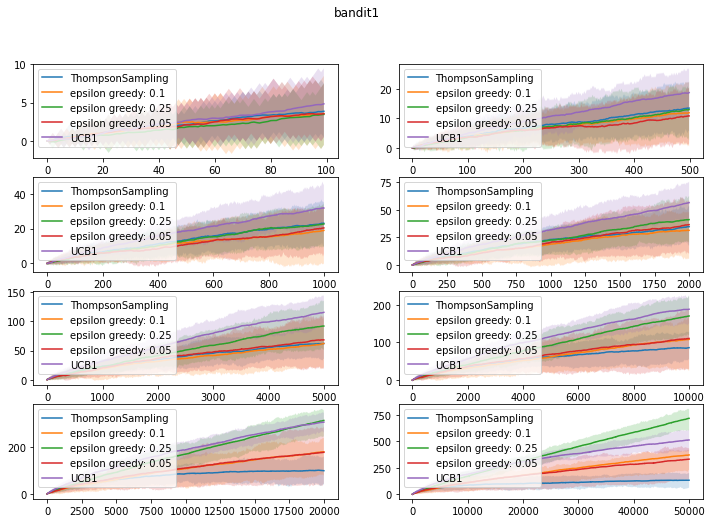

In [25]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

fig.suptitle('bandit1')
progress_bar = tqdm(total=8)
for i, step in enumerate(steps):
    named_bandit = named_bandits_to_test[0]
    row = int(i / 2)
    col = i % 2
    ax = axes[row][col]
    Drawer.draw(named_bandit, agents, 'cum', ax, step)
    ax.legend(loc='upper left')
    progress_bar.update(1)

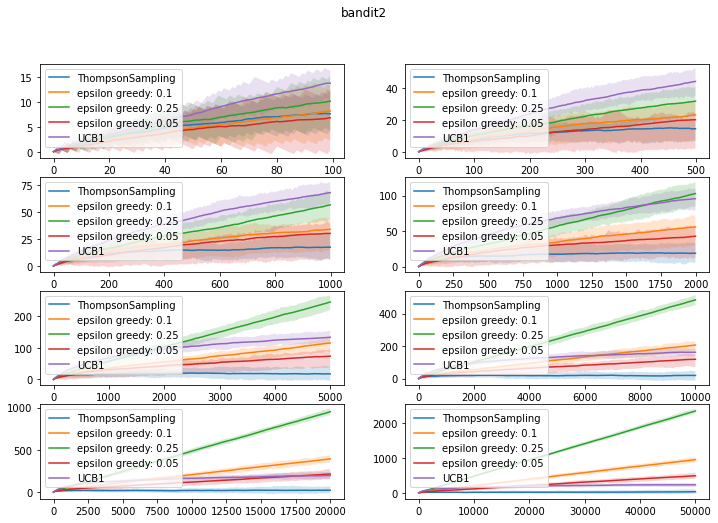

In [26]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

fig.suptitle('bandit2')
progress_bar = tqdm(total=8)
for i, step in enumerate(steps):
    named_bandit = named_bandits_to_test[1]
    row = int(i / 2)
    col = i % 2
    ax = axes[row][col]
    Drawer.draw(named_bandit, agents, 'cum', ax, step)
    ax.legend(loc='upper left')
    progress_bar.update(1)

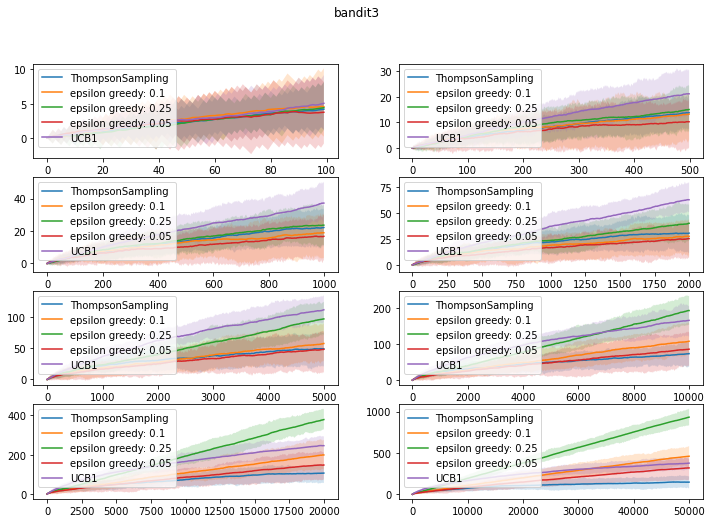

In [27]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

fig.suptitle('bandit3')
progress_bar = tqdm(total=8)
for i, step in enumerate(steps):
    named_bandit = named_bandits_to_test[2]
    row = int(i / 2)
    col = i % 2
    ax = axes[row][col]
    Drawer.draw(named_bandit, agents, 'cum', ax, step)
    ax.legend(loc='upper left')
    progress_bar.update(1)